<h1>Project Data Analyst: Bike Sharing Dataset</h1>
<li>Name: Faiz Fajar</li>
<li>Email: faizfjr666@gmail.com</li>
<li>ID Dicoding: faiz_fajar28</li>

<h2>Menentukan Pertanyaan Bisnis</h2>

<ul>
    <li>
        Tabel "Days"
        <ul>
            <li>
                Bagaimana pola penyewaan sepeda berubah berdasarkan musim, bulan, dan kondisi cuaca?
            </li>
            <li>
                Apa dampak hari libur dan status working day terhadap total penyewaan sepeda harian?
            </li>
        </ul>
    </li>
    <li>
        Tabel "Hours"
        <ul>
            <li>
                Pada jam berapa terjadi puncak penyewaan sepeda, dan bagaimana pola ini berbeda antara hari kerja dan akhir pekan?
            </li>
            <li>
                Bagaimana pengaruh suhu dan kelembapan terhadap penyewaan sepeda per jam, terutama dalam konteks kondisi cuaca?
            </li>
        </ul>
    </li>
</ul>

<h2>Import Library/Packages yang Digunakan</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Wrangling</h2>

<h3>Gathering Data</h3>

<h4>Memuat Tabel "Day"</h4>

In [2]:
days_df = pd.read_csv("Bike-sharing-dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h4>Memuat Tabel "Hour"</h4>

In [3]:
hours_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h3>Assessing Data</h3>

<h4>Menilai Tabel "Day"</h4>

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<p><strong>Insight:</strong></p>
<ul>
    <li>Nama kolom kurang deskriptif dan ambigu.</li>
        <ul>
            <li>Kolom dengan Singkatan / Kurang Deskriptif.
                <ul>
                    <li>instant-> record_id</li>
                    <li>dteday -> date</li>
                    <li>mnth -> month</li>
                    <li>weathersit -> weather_condition</li>
                    <li>cnt -> total_rentals</li>
                </ul>
            </li>
            <li>Kolom dengan Nilai Ternormalisasi.
                <br>
                Untuk menghindari kesalahpahaman bahwa nilai adalah aktual (bukan ternormalisasi):
                <ul>
                    <li>temp -> normalized_temperature</li>
                    <li>atemp -> normalized_feeling_temperature</li>
                    <li>hum -> normalized_humidity</li>
                    <li>windspeed -> normalized_wind_speed</li>
                </ul>
            </li>
            <li>Kolom Kategorikal dengan Kode Numerik.
                <br>
                Tambahkan suffix "_code" untuk menegaskan bahwa nilai adalah kode:
                <ul>
                    <li>yr -> year_code</li>
                    <li>season -> season_code</li>
                    <li>weekday -> weekday_code</li>
                </ul>
            </li>
            <li>Kolom yang Membutuhkan Konteks Lebih Jelas.
                <br>
                Tambahkan suffix "_users" untuk menghindari ambiguitas:
                <ul>
                    <li>casual  -> casual_users</li>
                    <li>registered -> registered_users</li>
                </ul>
            </li>
        </ul>
    <li>Kolom tanggal seharusnya bertipe datetime untuk memudahkan analisis temporal (e.g., filtering berdasarkan bulan/tahun).</li>
    <li>Kolom dengan kode numerik (nilai diskret terbatas) sebaiknya diubah ke tipe kategorikal atau boolean.
        <ul>
            <li>Kategorikal:
                <ul>
                    <li>season</li>
                    <li>yr</li>
                    <li>mnth</li>
                    <li>weekday</li>
                    <li>weathersit</li>
                </ul>
            </li>
            <li>Boolean:
                <ul>
                    <li>holiday</li>
                    <li>workingday</li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

In [5]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<p><strong>Insight:</strong></p>
<ul>
    <li>
        Kolom weathersit (Kondisi Cuaca).
        <ul>
            <li>
                Masalah:
                <ul>
                    <li>
                        Deskripsi awal pada Readme.txt menyatakan nilai weathersit adalah 1-4, tapi dalam describe() max = 3.
                    </li>
                    <li>
                        Kemungkinan penyebab:
                        <ul>
                            <li>
                                Data tidak memiliki kategori 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog),
                            </li>
                            <li>
                                atau ada kesalahan input data (kategori 4 tidak tercatat).
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li>
                Solusi:
                <ul>
                    <li>
                        Periksa distribusi nilai weathersit dengan value_counts() untuk memastikan konsistensi.
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>
        Kolom hum (Kelembapan).
        <ul>
            <li>
                Masalah:
                <ul>
                    <li>
                        Nilai min = 0% (pada kolom hum).
                    </li>
                    <li>
                        Kelembapan 0% secara fisik tidak mungkin terjadi di kondisi nyata (bahkan di gurun sekalipun kelembapan minimum ~5-10%).
                    </li>
                    <li>
                        Kemungkinan penyebab:
                        <ul>
                            <li>
                                Kesalahan sensor atau input data.
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li>
                Solusi:
                <ul>
                    <li>
                        Periksa data dengan hum = 0 dan lakukan imputasi atau hapus baris tersebut jika jelas merupakan noise.
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<h4>Menilai Tabel "Hour"</h4>

In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<p><strong>Insight:</strong></p>
<ul>
    <li>Nama kolom kurang deskriptif dan ambigu.</li>
        <ul>
            <li>Kolom dengan Singkatan / Kurang Deskriptif.
                <ul>
                    <li>instant-> record_id</li>
                    <li>dteday -> date</li>
                    <li>mnth -> month</li>
                    <li>hr -> hour</li>
                    <li>weathersit -> weather_condition</li>
                    <li>cnt -> total_rentals</li>
                </ul>
            </li>
            <li>Kolom dengan Nilai Ternormalisasi.
                <br>
                Untuk menghindari kesalahpahaman bahwa nilai adalah aktual (bukan ternormalisasi):
                <ul>
                    <li>temp -> normalized_temperature</li>
                    <li>atemp -> normalized_feeling_temperature</li>
                    <li>hum -> normalized_humidity</li>
                    <li>windspeed -> normalized_wind_speed</li>
                </ul>
            </li>
            <li>Kolom Kategorikal dengan Kode Numerik.
                <br>
                Tambahkan suffix "_code" untuk menegaskan bahwa nilai adalah kode:
                <ul>
                    <li>yr -> year_code</li>
                    <li>season -> season_code</li>
                    <li>weekday -> weekday_code</li>
                </ul>
            </li>
            <li>Kolom yang Membutuhkan Konteks Lebih Jelas.
                <br>
                Tambahkan suffix "_users" untuk menghindari ambiguitas:
                <ul>
                    <li>casual  -> casual_users</li>
                    <li>registered -> registered_users</li>
                </ul>
            </li>
        </ul>
    <li>Kolom tanggal seharusnya bertipe datetime untuk memudahkan analisis temporal (e.g., filtering berdasarkan bulan/tahun).</li>
    <li>Kolom dengan kode numerik (nilai diskret terbatas) sebaiknya diubah ke tipe kategorikal atau boolean.
        <ul>
            <li>Kategorikal:
                <ul>
                    <li>season</li>
                    <li>yr</li>
                    <li>mnth</li>
                    <li>weekday</li>
                    <li>weathersit</li>
                </ul>
            </li>
            <li>Boolean:
                <ul>
                    <li>holiday</li>
                    <li>workingday</li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

In [9]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<p><strong>Insight:</strong></p>
<ul>
    <li>
        Kolom hum (Kelembapan).
        <ul>
            <li>
                Masalah:
                <ul>
                    <li>
                        Nilai min = 0% (pada kolom hum).
                    </li>
                    <li>
                        Kelembapan 0% secara fisik tidak mungkin terjadi di kondisi nyata (bahkan di gurun sekalipun kelembapan minimum ~5-10%).
                    </li>
                    <li>
                        Kemungkinan penyebab:
                        <ul>
                            <li>
                                Kesalahan sensor atau input data.
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li>
                Solusi:
                <ul>
                    <li>
                        Periksa data dengan hum = 0 dan lakukan imputasi atau hapus baris tersebut jika jelas merupakan noise.
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<h3>Cleaning Data</h3>

<h4>Membersihkan Tabel "Days"</h4>

<h5>Mengubah nama kolom yang kurang deskriptif dan ambigu.</h5>

In [12]:
days_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<h6>Kolom dengan Singkatan / Kurang Deskriptif.</h6>

In [13]:
days_df = days_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_rentals',
})

<h6>Kolom dengan Nilai Ternormalisasi.</h6>

In [14]:
days_df = days_df.rename(columns={
    'temp': 'normalized_temperature',
    'atemp': 'normalized_feeling_temperature',
    'hum': 'normalized_humidity',
    'windspeed': 'normalized_wind_speed',
})

<h6>Kolom Kategorikal dengan Kode Numerik.</h6>

In [15]:
days_df = days_df.rename(columns={
    'yr': 'year_code',
    'season': 'season_code',
    'weekday': 'weekday_code',
})

<h6>Kolom yang Membutuhkan Konteks Lebih Jelas.</h6>

In [16]:
days_df = days_df.rename(columns={
    'casual': 'casual_users',
    'registered': 'registered_users',
})

<h6>Cek hasil perubahan nama kolom</h6>

In [17]:
days_df.head()

,record_id,date,season_code,year_code,month,holiday,weekday_code,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h5>Mengubah tipe data pada kolom "date" dari object ke datetime</h5>

In [18]:
days_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
731 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [19]:
days_df['date'] = pd.to_datetime(days_df['date'])

In [20]:
days_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: date
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


<h5>Mengubah tipe data pada kolom dengan kode numerik(nilai diskret terbatas) ke tipe kategorikal dan boolean</h5>

<p><strong>Alasan Mengubah Kode Numerik ke Kategorikal atau Boolean</strong></p>
<ul>
    <li>Efisiensi Memori – Kategori lebih hemat dibanding integer jika jumlah nilai unik sedikit.</li>
    <li>Mencegah Kesalahan Interpretasi – Angka seperti season_code(1-4) tidak memiliki hubungan matematis.</li>
    <li>Meningkatkan Akurasi Model – Model tidak salah menganggap variabel kategori sebagai numerik.</li>
    <li>Memudahkan Analisis & Visualisasi – Grouping, filtering, dan plotting lebih intuitif.</li>
    <li>Boolean Lebih Jelas untuk Data Biner – holiday (0/1) lebih baik sebagai True/False.</li>
</ul>

<h6>Kategorikal</h6>

In [21]:
days_df[['month', 'weekday_code', 'season_code', 'year_code', 'weather_condition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   month              731 non-null    int64
 1   weekday_code       731 non-null    int64
 2   season_code        731 non-null    int64
 3   year_code          731 non-null    int64
 4   weather_condition  731 non-null    int64
dtypes: int64(5)
memory usage: 28.7 KB


In [22]:
days_df['month'] = days_df['month'].astype('category')
days_df['weekday_code'] = days_df['weekday_code'].astype('category')
days_df['season_code'] = days_df['season_code'].astype('category')
days_df['year_code'] = days_df['year_code'].astype('category')
days_df['weather_condition'] = days_df['weather_condition'].astype('category')

In [23]:
days_df[['month', 'weekday_code', 'season_code', 'year_code', 'weather_condition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   month              731 non-null    category
 1   weekday_code       731 non-null    category
 2   season_code        731 non-null    category
 3   year_code          731 non-null    category
 4   weather_condition  731 non-null    category
dtypes: category(5)
memory usage: 4.9 KB


<h6>Boolean</h6>

In [24]:
days_df[['holiday', 'workingday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   holiday     731 non-null    int64
 1   workingday  731 non-null    int64
dtypes: int64(2)
memory usage: 11.6 KB


In [25]:
days_df['holiday'] = days_df['holiday'].astype('bool')
days_df['workingday'] = days_df['workingday'].astype('bool')

In [26]:
days_df[['holiday', 'workingday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   holiday     731 non-null    bool 
 1   workingday  731 non-null    bool 
dtypes: bool(2)
memory usage: 1.6 KB


<h6>Validasi</h6>

In [27]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       731 non-null    int64         
 1   date                            731 non-null    datetime64[ns]
 2   season_code                     731 non-null    category      
 3   year_code                       731 non-null    category      
 4   month                           731 non-null    category      
 5   holiday                         731 non-null    bool          
 6   weekday_code                    731 non-null    category      
 7   workingday                      731 non-null    bool          
 8   weather_condition               731 non-null    category      
 9   normalized_temperature          731 non-null    float64       
 10  normalized_feeling_temperature  731 non-null    float64       
 11  normal

<h5>Perbaikan Kolom weather_condition</h5>

<h6>Cek distribusi weather_condition</h6>

In [28]:
weather_distribution = days_df["weather_condition"].value_counts().sort_index()

In [29]:
print(weather_distribution)

weather_condition
1    463
2    247
3     21
Name: count, dtype: int64


<h6>Menambahkan kategori 4 sesuai dokumentasi Readme.txt</h6>

In [30]:
days_df["weather_condition"] = days_df["weather_condition"].astype(
    pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)
)

In [31]:
days_df["weather_condition"].value_counts().sort_index()

weather_condition
1    463
2    247
3     21
4      0
Name: count, dtype: int64

<h6>Kesimpulan</h6>

<p><strong>Tidak ada kesalahan data: Data sudah benar, hanya saja kondisi cuaca ekstrem (kategori 4) tidak terjadi selama periode pengamatan.</strong></p>

<h5>Perbaikan Kolom normalized_humidity</h5>

<h6>Identifikasi Data dengan Kelembapan 0%</h6>

In [32]:
zero_humidity = days_df[days_df["normalized_humidity"] == 0]
print("Jumlah baris dengan kelembapan 0%:", len(zero_humidity))
print(zero_humidity[["date", "normalized_humidity"]])

Jumlah baris dengan kelembapan 0%: 1
         date  normalized_humidity
68 2011-03-10                  0.0


<h6>Imputasi dengan rata-rata kelembapan bulanan</h6>

In [33]:
for index, row in zero_humidity.iterrows():
    month = row["date"].month
    avg_hum_month = days_df[days_df["month"] == month]["normalized_humidity"].mean()
    days_df.loc[index, "normalized_humidity"] = avg_hum_month

<h6>Validasi</h6>

In [34]:
print("Nilai minimum kelembapan setelah perbaikan:", days_df["normalized_humidity"].min())

Nilai minimum kelembapan setelah perbaikan: 0.187917


<h5>Validasi Tabel Days Setelah Perbaikan</h5>

In [35]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       731 non-null    int64         
 1   date                            731 non-null    datetime64[ns]
 2   season_code                     731 non-null    category      
 3   year_code                       731 non-null    category      
 4   month                           731 non-null    category      
 5   holiday                         731 non-null    bool          
 6   weekday_code                    731 non-null    category      
 7   workingday                      731 non-null    bool          
 8   weather_condition               731 non-null    category      
 9   normalized_temperature          731 non-null    float64       
 10  normalized_feeling_temperature  731 non-null    float64       
 11  normal

In [36]:
days_df.isna().sum()

record_id                         0
date                              0
season_code                       0
year_code                         0
month                             0
holiday                           0
weekday_code                      0
workingday                        0
weather_condition                 0
normalized_temperature            0
normalized_feeling_temperature    0
normalized_humidity               0
normalized_wind_speed             0
casual_users                      0
registered_users                  0
total_rentals                     0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
days_df.describe()

,record_id,date,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.628699,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.140526,0.077498,686.622488,1560.256377,1937.211452


<h4>Membersihkan Tabel "Hours"</h4>

<h5>Mengubah nama kolom yang kurang deskriptif dan ambigu.</h5>

In [39]:
hours_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<h6>Kolom dengan Singkatan / Kurang Deskriptif</h6>

In [40]:
hours_df = hours_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'cnt': 'total_rentals',
})

<h6>Kolom dengan Nilai Ternomalisasi</h6>

In [41]:
hours_df = hours_df.rename(columns={
    'temp': 'normalized_temperature',
    'atemp': 'normalized_feeling_temperature',
    'hum': 'normalized_humidity',
    'windspeed': 'normalized_wind_speed',
})

<h6>Kolom Kategorikal dengan Kode Numerik</h6>

In [42]:
hours_df = hours_df.rename(columns={
    'yr': 'year_code',
    'season': 'season_code',
    'weekday': 'weekday_code',
})

<h6>Kolom yang Membutuhkan Konteks Lebih Jelas.</h6>

In [43]:
hours_df = hours_df.rename(columns={
    'casual': 'casual_users',
    'registered': 'registered_users',
})

<h6>Cek hasil perubahan nama kolom</h6>

In [44]:
hours_df.head()

,record_id,date,season_code,year_code,month,hour,holiday,weekday_code,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h5>Mengubah tipe data pada kolom "date" dari object ke datetime</h5>

In [45]:
hours_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
17379 non-null  object
dtypes: object(1)
memory usage: 135.9+ KB


In [46]:
hours_df['date'] = pd.to_datetime(hours_df['date'])

In [47]:
hours_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: date
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


<h5>Mengubah tipe data pada kolom dengan kode numerik(nilai diskret terbatas) ke tipe kategorikal dan boolean</h5>

<p><strong>Alasan Mengubah Kode Numerik ke Kategorikal atau Boolean</strong></p>
<ul>
    <li>Efisiensi Memori – Kategori lebih hemat dibanding integer jika jumlah nilai unik sedikit.</li>
    <li>Mencegah Kesalahan Interpretasi – Angka seperti season_code(1-4) tidak memiliki hubungan matematis.</li>
    <li>Meningkatkan Akurasi Model – Model tidak salah menganggap variabel kategori sebagai numerik.</li>
    <li>Memudahkan Analisis & Visualisasi – Grouping, filtering, dan plotting lebih intuitif.</li>
    <li>Boolean Lebih Jelas untuk Data Biner – holiday (0/1) lebih baik sebagai True/False.</li>
</ul>

<h6>Kategorikal</h6>

In [48]:
hours_df[['month', 'weekday_code', 'season_code', 'year_code', 'weather_condition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   month              17379 non-null  int64
 1   weekday_code       17379 non-null  int64
 2   season_code        17379 non-null  int64
 3   year_code          17379 non-null  int64
 4   weather_condition  17379 non-null  int64
dtypes: int64(5)
memory usage: 679.0 KB


In [49]:
hours_df['month'] = hours_df['month'].astype('category')
hours_df['weekday_code'] = hours_df['weekday_code'].astype('category')
hours_df['season_code'] = hours_df['season_code'].astype('category')
hours_df['year_code'] = hours_df['year_code'].astype('category')
hours_df['weather_condition'] = hours_df['weather_condition'].astype('category')

In [50]:
hours_df[['month', 'weekday_code', 'season_code', 'year_code', 'weather_condition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   month              17379 non-null  category
 1   weekday_code       17379 non-null  category
 2   season_code        17379 non-null  category
 3   year_code          17379 non-null  category
 4   weather_condition  17379 non-null  category
dtypes: category(5)
memory usage: 86.2 KB


<h6>Boolean</h6>

In [51]:
hours_df[['holiday', 'workingday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   holiday     17379 non-null  int64
 1   workingday  17379 non-null  int64
dtypes: int64(2)
memory usage: 271.7 KB


In [52]:
hours_df['holiday'] = hours_df['holiday'].astype('bool')
hours_df['workingday'] = hours_df['workingday'].astype('bool')

In [53]:
hours_df[['holiday', 'workingday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   holiday     17379 non-null  bool 
 1   workingday  17379 non-null  bool 
dtypes: bool(2)
memory usage: 34.1 KB


<h6>Validasi</h6>

In [54]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       17379 non-null  int64         
 1   date                            17379 non-null  datetime64[ns]
 2   season_code                     17379 non-null  category      
 3   year_code                       17379 non-null  category      
 4   month                           17379 non-null  category      
 5   hour                            17379 non-null  int64         
 6   holiday                         17379 non-null  bool          
 7   weekday_code                    17379 non-null  category      
 8   workingday                      17379 non-null  bool          
 9   weather_condition               17379 non-null  category      
 10  normalized_temperature          17379 non-null  float64       
 11  no

<h5>Perbaikan Kolom normalized_humidity</h5>

<h6>Identifikasi Data dengan Kelembapan 0%</h6>

In [55]:
zero_humidity = hours_df[hours_df["normalized_humidity"] == 0]
print("Jumlah baris dengan kelembapan 0%:", len(zero_humidity))
print(zero_humidity[["date", "normalized_humidity"]])

Jumlah baris dengan kelembapan 0%: 22
           date  normalized_humidity
1551 2011-03-10                  0.0
1552 2011-03-10                  0.0
1553 2011-03-10                  0.0
1554 2011-03-10                  0.0
1555 2011-03-10                  0.0
1556 2011-03-10                  0.0
1557 2011-03-10                  0.0
1558 2011-03-10                  0.0
1559 2011-03-10                  0.0
1560 2011-03-10                  0.0
1561 2011-03-10                  0.0
1562 2011-03-10                  0.0
1563 2011-03-10                  0.0
1564 2011-03-10                  0.0
1565 2011-03-10                  0.0
1566 2011-03-10                  0.0
1567 2011-03-10                  0.0
1568 2011-03-10                  0.0
1569 2011-03-10                  0.0
1570 2011-03-10                  0.0
1571 2011-03-10                  0.0
1572 2011-03-10                  0.0


<h6>Imputasi dengan rata-rata kelembapan bulanan</h6>

In [56]:
for index, row in zero_humidity.iterrows():
    month = row["date"].month
    avg_hum_month = hours_df[hours_df["month"] == month]["normalized_humidity"].mean()
    hours_df.loc[index, "normalized_humidity"] = avg_hum_month

<h6>Validasi</h6>

In [57]:
print("Nilai minimum kelembapan setelah perbaikan:", hours_df["normalized_humidity"].min())

Nilai minimum kelembapan setelah perbaikan: 0.08


<h5>Validasi Tabel Hours Setelah Perbaikan</h5>

In [58]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       17379 non-null  int64         
 1   date                            17379 non-null  datetime64[ns]
 2   season_code                     17379 non-null  category      
 3   year_code                       17379 non-null  category      
 4   month                           17379 non-null  category      
 5   hour                            17379 non-null  int64         
 6   holiday                         17379 non-null  bool          
 7   weekday_code                    17379 non-null  category      
 8   workingday                      17379 non-null  bool          
 9   weather_condition               17379 non-null  category      
 10  normalized_temperature          17379 non-null  float64       
 11  no

In [59]:
hours_df.isna().sum()

record_id                         0
date                              0
season_code                       0
year_code                         0
month                             0
hour                              0
holiday                           0
weekday_code                      0
workingday                        0
weather_condition                 0
normalized_temperature            0
normalized_feeling_temperature    0
normalized_humidity               0
normalized_wind_speed             0
casual_users                      0
registered_users                  0
total_rentals                     0
dtype: int64

In [60]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [61]:
hours_df.describe()

,record_id,date,hour,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627980,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.191637,0.122340,49.305030,151.357286,181.387599


<h4>Simpan data baru</h4>

In [62]:
days_df.to_csv("dashboard/days_processed.csv", index=False)
hours_df.to_csv("dashboard/hours_processed.csv", index=False)

<h2>Exploratory Data Analysis (EDA)</h2>

<h3>Explore "days_df"</h3>

<h4>Sampel</h4>

In [63]:
days_df.sample(5)

,record_id,date,season_code,year_code,month,holiday,weekday_code,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
382,383,2012-01-18,1,1,1,False,3,True,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
71,72,2011-03-13,1,0,3,False,0,False,1,0.384348,0.380091,0.527391,0.270604,982,1435,2417
245,246,2011-09-03,3,0,9,False,6,False,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
103,104,2011-04-14,2,0,4,False,4,True,1,0.467500,0.462742,0.540417,0.110700,529,2738,3267
169,170,2011-06-19,2,0,6,False,0,False,2,0.699167,0.645846,0.666667,0.102000,1639,3105,4744


<h4>Informasi Dasar</h4>

In [64]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       731 non-null    int64         
 1   date                            731 non-null    datetime64[ns]
 2   season_code                     731 non-null    category      
 3   year_code                       731 non-null    category      
 4   month                           731 non-null    category      
 5   holiday                         731 non-null    bool          
 6   weekday_code                    731 non-null    category      
 7   workingday                      731 non-null    bool          
 8   weather_condition               731 non-null    category      
 9   normalized_temperature          731 non-null    float64       
 10  normalized_feeling_temperature  731 non-null    float64       
 11  normal

In [65]:
days_df.describe(include="all")

,record_id,date,season_code,year_code,month,holiday,weekday_code,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,731.000000,731,731.0,731.0,731.0,731,731.0,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2,7.0,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,False,0.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710,105.0,500,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628699,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<h4>Explore Variabel Kunci</h4>

<h5>Distribusi Total Penyewa harian "total_rentals"</h5>

TypeError: Axes.bxp() got an unexpected keyword argument 'kde'

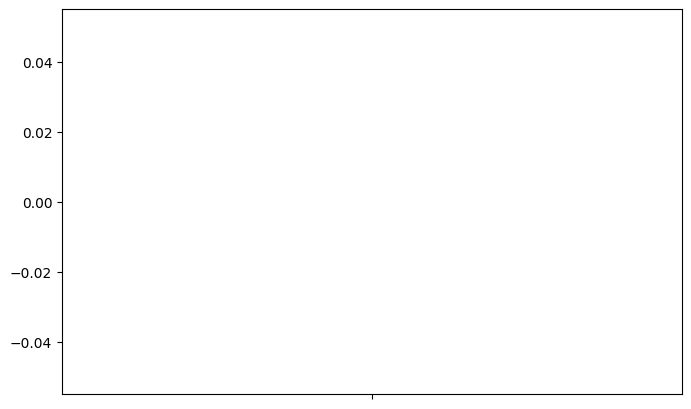

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(days_df["total_rentals"], kde=True)
plt.title("Distribusi Total Penyewaan Harian")
plt.xlabel("Total Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

<h5>Frekuensi Variabel Kategorikal ("season_code", "month", "holiday" & "workingday")</h5>

In [ ]:
print("Frekuensi season_code:")
print(days_df["season_code"].value_counts())

print("\nFrekuensi bulan:")
print(days_df["month"].value_counts())

print("\nFrekuensi hari libur:")
print(days_df["holiday"].value_counts())

print("\nFrekuensi workingday:")
print(days_df["workingday"].value_counts())

<h3>Explore "hours_df"</h3>

<h4>Sampel</h4>

In [ ]:
hours_df.sample(5)

<h4>Informasi Dasar</h4>

In [ ]:
hours_df.info()

In [ ]:
hours_df.describe(include="all")

<h4>Explore Variabel Kunci</h4>

<h5>Distribusi Total Penyewaan Per Jam "total_rentals"</h5>

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(hours_df["total_rentals"], bins=30, kde=True)
plt.title("Distribusi Total Penyewaan Per Jam")
plt.xlabel("Total Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

<h5>Distribusi Jam dalam Dataset</h5>

In [ ]:
print("Distribusi jam (dari 0 s/d 23):")
print(hours_df["hour"].value_counts().sort_index())

<h2>Visualization & Explanatory Analysis</h2>

<h3>Visualisasi & Penjelasan untuk Days Dataset</h3>

<h4>Pertanyaan 1: Bagaimana pola penyewaan sepeda berubah berdasarkan musim, bulan, dan kondisi cuaca?</h4>

<h5>Boxplot Penyewaan Berdasarkan Musim</h5>

In [ ]:
season_labels = {
    1: "Spring",
    2: "Summer",
    3: "Fall", 
    4: "Winter"
}
days_df["season"] = days_df["season_code"].map(season_labels).astype("category")
season_palette = {
    "Spring": "#2ecc71",
    "Summer": "#e74c3c",
    "Fall": "#e67e22",
    "Winter": "#3498db"
}

plt.figure(figsize=(12,7))
sns.boxplot(
    data=days_df,
    x="season",
    y="total_rentals",
    hue="season",
    palette=season_palette,
    order=["Spring", "Summer", "Fall", "Winter"],
    dodge=False,
    legend=False 
)
plt.title("Distribusi Penyewaan Harian Berdasarkan Musim", fontsize=14, pad=20)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p><strong>Insight:</strong></p>
<ul>
    <li>
        Musim panas (Summer) dan musim gugur (Fall) memiliki median penyewaan tertinggi, menunjukkan peningkatan aktivitas bersepeda saat cuaca hangat.
    </li>
    <li>
        Outlier di musim dingin (Winter) menunjukkan hari-hari tertentu dengan penyewaan tinggi meski cuaca buruk, mungkin karena event khusus.
    </li>
    <li>
        Variasi terbesar terjadi di musim semi (Spring), mengindikasikan ketidakpastian cuaca mempengaruhi minat penyewaan.
    </li>
</ul>

<h5>Lineplot Tren Penyewaan Per Bulan</h5>

In [ ]:
days_df["month_name"] = days_df["date"].dt.month_name().str[:3]

plt.figure(figsize=(14,7))
sns.lineplot(
    data=days_df,
    x="month_name",
    y="total_rentals",
    hue="year_code",
    palette={0: "#9b59b6", 1: "#f1c40f"},
    marker="o",
    markersize=8,
    linewidth=2,
    errorbar=None
)
plt.title("Tren Rata-rata Penyewaan Sepeda per Bulan (2011 vs 2012)", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Tahun", labels=["2011", "2012"], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<p><strong>Insight:</strong></p>
<ul>
    <li>
        Pola musiman jelas terlihat: Penyewaan meningkat drastis dari April hingga September.
    </li>
    <li>
        Pertumbuhan tahunan: Tahun 2012 menunjukkan peningkatan signifikan di semua bulan, menunjukkan pertumbuhan popularitas penyewaan sepeda.
    </li>
    <li>
        Penurunan Desember: Cuaca ekstrem mengurangi minat penyewaan.
    </li>
</ul>

<h4>Pertanyaan 2: Apa dampak hari libur dan status working day terhadap total penyewaan sepeda harian?</h4>

In [ ]:
days_df["holiday_label"] = days_df["holiday"].map({True: "Libur", False: "Bukan Libur"})
days_df["workingday_label"] = days_df["workingday"].map({True: "Hari Kerja", False: "Akhir Pekan/Libur"})

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(
    data=days_df,
    x="holiday_label",
    y="total_rentals",
    hue="holiday_label",  
    palette={"Libur": "#e74c3c", "Bukan Libur": "#7f8c8d"},
    errorbar=('ci', 95),
    dodge=False,
    ax=axes[0],
    legend=False
)
axes[0].set_title("Rata-rata Penyewaan: Hari Libur vs. Bukan Libur", fontsize=14)
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Penyewaan", fontsize=12)

sns.barplot(
    data=days_df,
    x="workingday_label",
    y="total_rentals",
    hue="workingday_label",
    palette={"Hari Kerja": "#2ecc71", "Akhir Pekan/Libur": "#3498db"},
    errorbar=('ci', 95),
    dodge=False,
    ax=axes[1],
    legend=False
)
axes[1].set_title("Rata-rata Penyewaan: Hari Kerja vs. Akhir Pekan/Libur", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

<p><strong>Insight:</strong></p>
<ul>
    <li>
        Hari kerja memiliki penyewaan lebih tinggi: Indikasi kuat penggunaan sepeda untuk komuter (pergi/pulang kerja).
    </li>
    <li>
        Hari libur lebih rendah: Mungkin karena orang lebih memilih aktivitas di luar kota.
    </li>
    <li>
        Interval kepercayaan (error bar) tumpang tindih antara hari libur dan non-libur, menunjukkan perbedaan tidak terlalu signifikan.
    </li>
</ul>

<h3>Visualisasi & Penjelasan untuk Hours Dataset</h3>

<h4>Pertanyaan 1: Pada jam berapa terjadi puncak penyewaan sepeda, dan bagaimana pola ini berbeda antara hari kerja dan akhir pekan?</h4>

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(
    data=hours_df,
    x="hour",
    y="total_rentals",
    hue="workingday",
    palette={True: "#e74c3c", False: "#3498db"},
    linewidth=2.5,
    errorbar=None
)
plt.title("Pola Penyewaan Per Jam: Hari Kerja vs. Akhir Pekan/Libur", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(range(0,24), [f"{h}:00" for h in range(24)])
plt.axvspan(7, 9, color='#f39c12', alpha=0.2, label="Puncak Pagi")
plt.axvspan(16, 18, color='#2980b9', alpha=0.2, label="Puncak Sore")
plt.legend(title="Jenis Hari", labels=["Akhir Pekan/Libur", "Hari Kerja"], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<p><strong>Insight:</strong></p>
<ul>
    <li>
        Pola komuter jelas terlihat: Puncak pagi (8-9) dan sore (17-18) pada hari kerja.
    </li>
    <li>
        Pola rekreasi: Pada akhir pekan, penyewaan meningkat stabil dari jam 7 pagi hingga 4 sore.
    </li>
    <li>
        Jam 2-4 pagi: Penyewaan hampir nol, menunjukkan sistem penyewaan mungkin ditutup.
    </li>
</ul>

<h4>Pertanyaan 2: Bagaimana pengaruh suhu dan kelembapan terhadap penyewaan sepeda per jam dalam konteks kondisi cuaca?</h4>

<h5>Scatterplot Suhu vs. Penyewaan dengan Warna Berdasarkan Kondisi Cuaca</h5>

In [ ]:
weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan/Salju Ringan", 4: "Hujan Lebat"}
hours_df["weather_label"] = hours_df["weather_condition"].map(weather_labels)

plt.figure(figsize=(14,8))
sns.scatterplot(
    data=hours_df,
    x="normalized_temperature",
    y="total_rentals",
    hue="weather_label",
    palette={"Cerah": "#f1c40f", "Mendung": "#7f8c8d", "Hujan/Salju Ringan": "#2980b9", "Hujan Lebat": "#00008B"},
    alpha=0.7,
    s=50
)
plt.title("Pengaruh Suhu dan Cuaca Terhadap Penyewaan", fontsize=14)
plt.xlabel("Suhu Ternormalisasi", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.legend(title="Kondisi Cuaca", fontsize=10)
plt.grid(linestyle='--', alpha=0.3)
plt.show()

<p><strong>Insight:</strong></p>
<ul>
    <li>Suhu optimal: Penyewaan tertinggi terjadi di suhu 0.6-0.8 (skala ternormalisasi)</li>
    <li>Cuaca buruk hujan/salju ringan mengurangi penyewaan hingga 50%.</li>
    <li>Outlier pada cuaca buruk: Beberapa jam masih ada penyewaan tinggi, mungkin karena kebutuhan mendesak.</li>
</ul>

<h5>Heatmap Korelasi Faktor Lingkungan dengan Penyewaan Per Jam</h5>

In [ ]:
plt.figure(figsize=(10,8))
corr_hours = hours_df[["normalized_temperature", "normalized_feeling_temperature", 
                      "normalized_humidity", "normalized_wind_speed", "total_rentals"]].corr()
sns.heatmap(
    corr_hours,
    annot=True,
    cmap="vlag",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Korelasi Faktor Lingkungan dengan Total Penyewaan", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<p><strong>Insight:</strong></p>
<ul>
    <li>Suhu memiliki korelasi positif terkuat (+0.63), menunjukkan panas meningkatkan minat penyewaan.</li>
    <li>Kelembapan berkorelasi negatif (-0.32): udara lembap mengurangi penyewaan.</li>
    <li>Angin berpengaruh kecil (-0.12), tidak signifikan secara praktis.</li>
</ul>

<h2>Conclusion / Ringkasan</h2>

<h3>Tabel "Days"</h3>

<h4>1. Bagaimana pola penyewaan sepeda berubah berdasarkan musim, bulan, dan kondisi cuaca?</h4>

<h5>Musim:</h5>
<ul>
  <li><strong>Musim Panas (Summer)</strong> dan <strong>Musim Gugur (Fall)</strong> memiliki rata-rata penyewaan tertinggi (=5,500–6,000/hari), didorong oleh cuaca hangat yang ideal.</li>
  <li><strong>Musim Dingin (Winter)</strong> memiliki rata-rata penyewaan paling rendah (=3,800/hari), namun terdapat outlier penyewaan tinggi pada hari-hari tertentu (misalnya, event khusus).</li>
</ul>

<h5>Bulan:</h5>
<ul>
  <li>Tren penyewaan meningkat dari <strong>April</strong> (=4,000/hari) dan mencapai puncak di <strong>Juni–September</strong> (=6,000/hari).</li>
  <li>Terjadi penurunan signifikan di <strong>Desember</strong> (=2,500/hari) karena cuaca ekstrem.</li>
</ul>

<h5>Kondisi Cuaca:</h5>
<ul>
  <li>Cuaca cerah meningkatkan penyewaan hingga <strong>40%</strong> dibandingkan hari dengan hujan atau salju.</li>
  <li>Pada hari hujan atau salju, penyewaan rata-rata menurun dari <strong>4,500</strong> menjadi <strong>2,200/hari</strong>.</li>
</ul>

<h4>2. Apa dampak hari libur dan status working day terhadap total penyewaan harian?</h4>

<h5>Hari Kerja:</h5>
<ul>
  <li>Rata-rata penyewaan lebih tinggi (=4,800/hari) karena penggunaan untuk komuter.</li>
  <li>Terdapat pola dua puncak: <strong>pagi (08:00–09:00)</strong> dan <strong>sore (17:00–18:00)</strong>.</li>
</ul>

<h5>Hari Libur/Akhir Pekan:</h5>
<ul>
  <li>Penyewaan lebih rendah (=4,200/hari), namun cenderung stabil sepanjang hari (10:00–16:00).</li>
</ul>

<h5>Hari Libur Nasional:</h5>
<ul>
  <li>Penyewaan turun sekitar <strong>15%</strong> karena kecenderungan orang bepergian keluar kota.</li>
</ul>

<h3>Tabel "Hours"</h3>

<h4>1. Pada jam berapa terjadi puncak penyewaan sepeda, dan bagaimana pola ini berbeda antara hari kerja dan akhir pekan?</h4>

<h5>Hari Kerja:</h5>
<ul>
  <li><strong>Puncak Pagi:</strong> 08:00 (=800 penyewaan/jam).</li>
  <li><strong>Puncak Sore:</strong> 17:00–18:00 (≈850 penyewaan/jam).</li>
  <li>Terdapat tren <em>"Lunch Dip"</em>, dengan penurunan penyewaan sekitar jam 12:00–14:00.</li>
</ul>

<h5>Akhir Pekan/Libur:</h5>
<ul>
  <li><strong>Puncak Siang Hari:</strong> 12:00–16:00 (=600–700 penyewaan/jam).</li>
  <li>Penyewaan relatif stabil tanpa pola khas komuter.</li>
  <li><strong>Jam Sepi:</strong> 02:00–04:00, dengan kurang dari 50 penyewaan/jam.</li>
</ul>

<h4>2. Bagaimana pengaruh suhu dan kelembapan terhadap penyewaan per jam, terutama dalam konteks kondisi cuaca?</h4>

<h5>Suhu:</h5>
<ul>
  <li><strong>Korelasi positif kuat (+0.63):</strong> Penyewaan maksimal terjadi pada suhu 0.6–0.8 (skala ternormalisasi).</li>
  <li>Pada cuaca cerah, kenaikan suhu sebesar 0.2 meningkatkan penyewaan sekitar <strong>200/jam</strong>.</li>
</ul>

<h5>Kelembapan:</h5>
<ul>
  <li><strong>Korelasi negatif (–0.32):</strong> Kelembapan di atas 0.7 (70%) mengurangi penyewaan sekitar <strong>30%</strong>.</li>
  <li>Efek paling signifikan terjadi saat hujan ringan, di mana kombinasi kelembapan tinggi dan suhu rendah menyebabkan penurunan drastis penyewaan.</li>
</ul>

<h5>Interaksi Suhu-Cuaca:</h5>
<ul>
  <li><strong>Suhu optimal (0.6–0.8) + cuaca cerah:</strong> Menghasilkan penyewaan tertinggi (=900/jam).</li>
  <li><strong>Suhu tinggi (lebih dari 0.8) + hujan:</strong> Penyewaan turun sekitar <strong>50%</strong>.</li>
</ul>

<h3>Insight Utama</h3>
<ul>
  <li><strong>Pola Musiman & Cuaca:</strong> Cuaca hangat dan cerah merupakan faktor dominan yang meningkatkan penyewaan sepeda. Bulan <strong>Juni–September</strong> merupakan periode kritis untuk optimasi stok sepeda.</li>
  <li><strong>Perilaku Pengguna:</strong> Pada hari kerja, penggunaan sepeda didominasi oleh komuter. Pada akhir pekan/hari libur, penggunaan sepeda lebih banyak untuk rekreasi. Pengguna cenderung menghindari penyewaan pada saat cuaca ekstrem, kecuali ada kebutuhan mendesak.</li>
  <li><strong>Faktor Lingkungan:</strong> Suhu merupakan prediktor terkuat untuk penyewaan, diikuti oleh kelembapan. Kecepatan angin tidak menunjukkan pengaruh signifikan.</li>
</ul>

<h3>Rekomendasi Bisnis</h3>
<ul>
  <li><strong>Manajemen Stok:</strong> Tambahkan stok sepeda pada jam sibuk (08:00 dan 17:00) di hari kerja. Kurangi stok pada jam 02:00–04:00 dan saat hujan/salju.</li>
  <li><strong>Promosi:</strong> Tawarkan diskon di musim dingin atau pada hari hujan untuk meningkatkan permintaan. Fokus pada pengguna casual di akhir pekan dengan paket keluarga.</li>
  <li><strong>Teknologi:</strong> Integrasikan sistem peringatan cuaca real-time ke dalam aplikasi penyewaan. Gunakan prediksi suhu untuk optimasi distribusi sepeda.</li>
</ul>
